In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random

pd.pandas.set_option('display.max_columns', None)
%matplotlib inline
random.seed(7)

In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [17]:
# src_csv = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'data', 'concrete.csv'))
# df = pd.read_csv(src_csv)

# df.head()

df_train = pd.read_csv('train_concrete.csv')
df_test = pd.read_csv('test_concrete.csv')
df_dev = pd.read_csv('dev_concrete.csv')

X_train = df_train.iloc[:, :-1].values
X_test = df_test.iloc[:, :-1].values
X_dev = df_dev.iloc[:, :-1].values
y_train = df_train.iloc[:, -1].values.reshape(-1,1)
y_test = df_test.iloc[:, -1].values.reshape(-1,1)
y_dev = df_dev.iloc[:, -1].values.reshape(-1,1)

In [18]:
X_train = df_train.drop(df_train.columns[-1], axis=1).values
y_train = df_train[df_train.columns[-1]].values.reshape(-1, 1)
print(X_train.shape, y_train.shape)

(618, 6) (618, 1)


In [38]:
# train, validation, test = 60%, 20%, 20%
# X_tv, X_test, y_tv, y_dev = train_test_split(X_train, y_train, test_size=0.2, random_state=7)
# X_train, X_val, y_train, y_val = train_test_split(X_tv, y_tv, test_size=0.25, random_state=7)

In [22]:
class MyLinearRegression_LSM:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.theta = None
        
    def fit(self, X, y):        
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        self.theta = np.linalg.inv(X.T @ X) @ X.T @ y
    
    def predict(self, X):
        return X @ self.theta[1:] + self.theta[0]
    
    
model = MyLinearRegression_LSM()
model.fit(X_train, y_train)
y_pred = model.predict(X_dev)

mse = mean_squared_error(y_dev, y_pred)
mae = mean_absolute_error(y_dev, y_pred)
r2 = r2_score(y_dev, y_pred)


y_pred_test=model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)




print(mse)
print(r2)


0.3722660547706093
0.6439802910604244


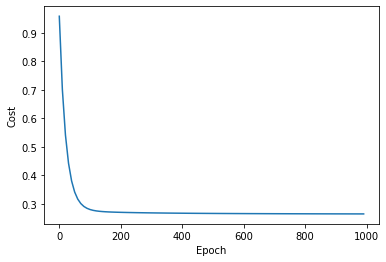

0.4140560103660347
[[-0.01857822]
 [ 0.51801781]
 [ 0.27927288]
 [ 0.03607182]
 [-0.22004312]
 [ 0.14334713]
 [-0.09821424]
 [-0.11680488]
 [ 0.49413377]]


In [8]:
class MyLinearRegression_BGD:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.theta = None
        
    def fit(self, X, y):
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        n_samples, n_dims = X.shape
        
        self.theta = np.zeros((n_dims, 1))
        
        cost_list = []
        epoch_list = []
    
        for epoch in range(self.epochs):
            y_pred = X @ self.theta
            
            dt = (2 / n_samples) * (X.T @ (y_pred - y))
    
            self.theta -= self.learning_rate * dt
            
            if epoch % 10 == 0:
                cost = np.mean(np.square(y_pred - y))
                cost_list.append(cost)
                epoch_list.append(epoch)
            
        plt.plot(epoch_list, cost_list)
        plt.xlabel('Epoch')
        plt.ylabel('Cost')
        plt.show()
    
    def predict(self, X):
        return X @ self.theta[1:] + self.theta[0]
    
    
model = MyLinearRegression_BGD()
model.fit(X_train, y_train)
y_pred = model.predict(X_dev)

mse = mean_squared_error(y_dev, y_pred)
mae = mean_absolute_error(y_dev, y_pred)
r2 = r2_score(y_dev, y_pred)

y_pred_test=model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print(mae)
print(model.theta)

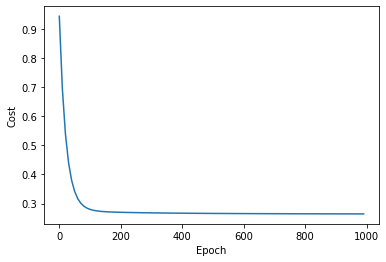

0.4140675263396991
[[-0.01858379]
 [ 0.51813714]
 [ 0.27921911]
 [ 0.03592034]
 [-0.22021037]
 [ 0.14345063]
 [-0.09822412]
 [-0.11662858]
 [ 0.49409512]]


In [9]:
class MyLinearRegression_SGD:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.theta = None
        
    def fit(self, X, y):        
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        n_samples, n_dims = X.shape
        
        self.theta = np.zeros((n_dims, 1))
        
        cost_list = []
        epoch_list = []
    
        for epoch in range(self.epochs):
            cost = 0
            
            for i in range(n_samples):
                X_i = X[i : i+1]
                y_i = y[i : i+1]
                                                 
                y_pred = X_i @ self.theta
    
                dt = (2 / n_samples) * (X_i.T @ (y_pred - y_i))
        
                self.theta -= self.learning_rate * dt
                
                cost += np.square(y_pred - y_i).item()
            
            if epoch % 10 == 0:
                cost = cost / n_samples
                cost_list.append(cost)
                epoch_list.append(epoch)
            
        plt.plot(epoch_list, cost_list)
        plt.xlabel('Epoch')
        plt.ylabel('Cost')
        plt.show()
    
    def predict(self, X):
        return X @ self.theta[1:] + self.theta[0]
    
    
model = MyLinearRegression_SGD()
model.fit(X_train, y_train)
y_pred = model.predict(X_dev)

mse = mean_squared_error(y_dev, y_pred)
mae = mean_absolute_error(y_dev, y_pred)
r2 = r2_score(y_dev, y_pred)


y_pred_test=model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)
print(mae)
print(model.theta)

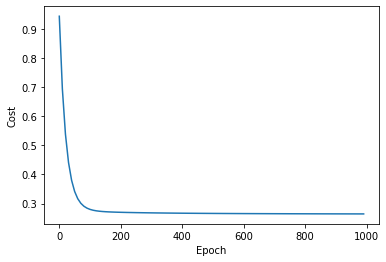

0.4140598915495241
[[-0.0186009 ]
 [ 0.51814254]
 [ 0.27921961]
 [ 0.03593209]
 [-0.22020891]
 [ 0.1434431 ]
 [-0.09822792]
 [-0.11664064]
 [ 0.49411272]]


In [10]:
class MyLinearRegression_MBGD:
    def __init__(self, learning_rate=0.01, epochs=1000, batch_size=64):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.theta = None
        
    def fit(self, X, y):        
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        n_samples, n_dims = X.shape
        
        self.theta = np.zeros((n_dims, 1))
        
        cost_list = []
        epoch_list = []
    
        for epoch in range(self.epochs):
            cost = 0
            
            for batch_start in range(0, n_samples, self.batch_size):
                batch_end = min(batch_start + self.batch_size, n_samples)
                X_batch = X[batch_start : batch_end]
                y_batch = y[batch_start : batch_end]
                                                 
                y_pred = X_batch @ self.theta
    
                dt = (2 / n_samples) * (X_batch.T @ (y_pred - y_batch))
        
                self.theta -= self.learning_rate * dt
                
                cost += np.sum(np.square(y_pred - y_batch))
            
            if epoch % 10 == 0:
                cost = cost / n_samples
                cost_list.append(cost)
                epoch_list.append(epoch)
            
        plt.plot(epoch_list, cost_list)
        plt.xlabel('Epoch')
        plt.ylabel('Cost')
        plt.show()
    
    def predict(self, X):
        return X @ self.theta[1:] + self.theta[0]
    
    
model = MyLinearRegression_MBGD()
model.fit(X_train, y_train)
y_pred = model.predict(X_dev)

mse = mean_squared_error(y_dev, y_pred)
mae = mean_absolute_error(y_dev, y_pred)
r2 = r2_score(y_dev, y_pred)

y_pred_test=model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print(mae)
print(model.theta)

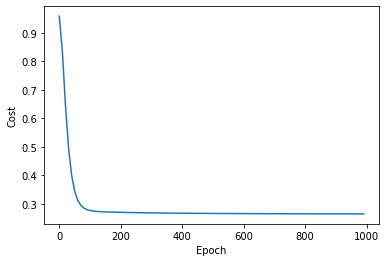

0.4140217926380877
[[-0.01857666]
 [ 0.51807652]
 [ 0.27936862]
 [ 0.03626696]
 [-0.22039423]
 [ 0.14293406]
 [-0.09834654]
 [-0.11689356]
 [ 0.49415244]]


In [11]:
class MyLinearRegression_Momentum:
    def __init__(self, learning_rate=0.01, beta=0.9, epochs=1000):
        self.learning_rate = learning_rate
        self.beta = beta
        self.epochs = epochs
        self.theta = None
        
    def fit(self, X, y):
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        n_samples, n_dims = X.shape
        
        self.theta = np.zeros((n_dims, 1))
        v = np.zeros((n_dims, 1))
        
        cost_list = []
        epoch_list = []
    
        for epoch in range(self.epochs):
            y_pred = X @ self.theta
            
            dt = (2 / n_samples) * (X.T @ (y_pred - y))
            
            v = self.beta * v + (1 - self.beta) * dt
            self.theta -= self.learning_rate * v
            
            if epoch % 10 == 0:
                cost = np.mean(np.square(y_pred - y))
                cost_list.append(cost)
                epoch_list.append(epoch)
            
        plt.plot(epoch_list, cost_list)
        plt.xlabel('Epoch')
        plt.ylabel('Cost')
        plt.show()
    
    def predict(self, X):
        return X @ self.theta[1:] + self.theta[0]
    
    
model = MyLinearRegression_Momentum()
model.fit(X_train, y_train)
y_pred = model.predict(X_dev)

mse = mean_squared_error(y_dev, y_pred)
mae = mean_absolute_error(y_dev, y_pred)
r2 = r2_score(y_dev, y_pred)

y_pred_test=model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print(mae)
print(model.theta)

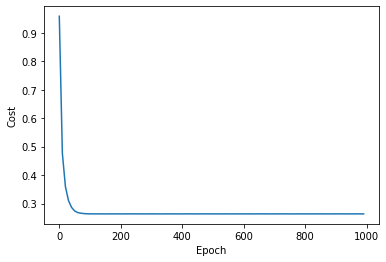

0.4120201999073763
[[-0.02433916]
 [ 0.57983131]
 [ 0.34644378]
 [ 0.09720707]
 [-0.17461257]
 [ 0.15247837]
 [-0.05735853]
 [-0.05217868]
 [ 0.49775876]]


In [12]:
class MyLinearRegression_RMSprop:
    def __init__(self, learning_rate=0.01, beta=0.9, epochs=1000):
        self.learning_rate = learning_rate
        self.beta = beta
        self.epochs = epochs
        self.theta = None
        
    def fit(self, X, y):
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        n_samples, n_dims = X.shape
        
        self.theta = np.zeros((n_dims, 1))
        s = np.zeros((n_dims, 1))
        
        cost_list = []
        epoch_list = []
    
        for epoch in range(self.epochs):
            y_pred = X @ self.theta
            
            dt = (2 / n_samples) * (X.T @ (y_pred - y))
            
            s = self.beta * s + (1 - self.beta) * np.square(dt)
            self.theta -= self.learning_rate * (dt / np.sqrt(s))
            
            if epoch % 10 == 0:
                cost = np.mean(np.square(y_pred - y))
                cost_list.append(cost)
                epoch_list.append(epoch)
            
        plt.plot(epoch_list, cost_list)
        plt.xlabel('Epoch')
        plt.ylabel('Cost')
        plt.show()
    
    def predict(self, X):
        return X @ self.theta[1:] + self.theta[0]
    
    
model = MyLinearRegression_RMSprop()
model.fit(X_train, y_train)
y_pred = model.predict(X_dev)

mse = mean_squared_error(y_dev, y_pred)
mae = mean_absolute_error(y_dev, y_pred)
r2 = r2_score(y_dev, y_pred)


y_pred_test=model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)
print(mae)
print(model.theta)

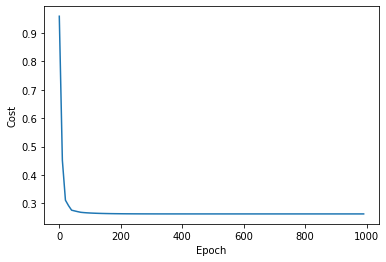

0.41135441834493963
[[-0.01937132]
 [ 0.58460904]
 [ 0.34371336]
 [ 0.09263104]
 [-0.16970368]
 [ 0.14734328]
 [-0.05320667]
 [-0.0569309 ]
 [ 0.49246825]]


In [13]:
class MyLinearRegression_Adam:
    def __init__(self, learning_rate=0.01, beta1=0.9, beta2=0.999, epochs=1000):
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epochs = epochs
        self.theta = None
        
    def fit(self, X, y):
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        n_samples, n_dims = X.shape
        
        self.theta = np.zeros((n_dims, 1))
        v = np.zeros((n_dims, 1))
        s = np.zeros((n_dims, 1))
        eps = 1e-8
        
        cost_list = []
        epoch_list = []
    
        for epoch in range(self.epochs):
            y_pred = X @ self.theta
            
            dt = (2 / n_samples) * (X.T @ (y_pred - y))
            
            v = self.beta1 * v + (1 - self.beta1) * dt
            s = self.beta2 * s + (1 - self.beta2) * np.square(dt)
            v_corrected = v / (1 - self.beta1)
            s_corrected = s / (1 - self.beta2)
            self.theta -= self.learning_rate * (v_corrected / (np.sqrt(s_corrected) + eps))
            
            if epoch % 10 == 0:
                cost = np.mean(np.square(y_pred - y))
                cost_list.append(cost)
                epoch_list.append(epoch)
            
        plt.plot(epoch_list, cost_list)
        plt.xlabel('Epoch')
        plt.ylabel('Cost')
        plt.show()
    
    def predict(self, X):
        return X @ self.theta[1:] + self.theta[0]
    
    
model = MyLinearRegression_Adam()
model.fit(X_train, y_train)
y_pred = model.predict(X_dev)

mse = mean_squared_error(y_dev, y_pred)
mae = mean_absolute_error(y_dev, y_pred)
r2 = r2_score(y_dev, y_pred)

y_pred_test=model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print(mae)
print(model.theta)

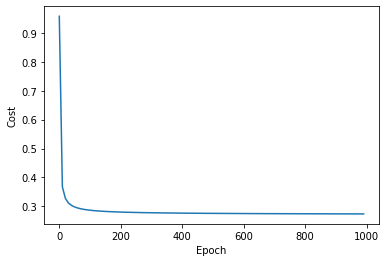

0.4399308245903804
[[-0.01049909]
 [ 0.39749827]
 [ 0.16240798]
 [-0.0802592 ]
 [-0.20702138]
 [ 0.21913553]
 [-0.12872838]
 [-0.16718799]
 [ 0.46226525]]


In [14]:
class MyLinearRegression_LR_Decay:
    def __init__(self, learning_rate=0.1, decay_rate=0.5, epochs=1000):
        self.learning_rate = learning_rate
        self.decay_rate = decay_rate
        self.epochs = epochs
        self.theta = None
        
    def fit(self, X, y):
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        n_samples, n_dims = X.shape
        
        self.theta = np.zeros((n_dims, 1))
        decay_rate = 0.5
        
        cost_list = []
        epoch_list = []
    
        for epoch in range(self.epochs):
            y_pred = X @ self.theta
            
            dt = (2 / n_samples) * (X.T @ (y_pred - y))
            
            learning_rate = self.learning_rate / (1 + self.decay_rate * epoch)
            self.theta -= learning_rate * dt
            
            if epoch % 10 == 0:
                cost = np.mean(np.square(y_pred - y))
                cost_list.append(cost)
                epoch_list.append(epoch)
            
        plt.plot(epoch_list, cost_list)
        plt.xlabel('Epoch')
        plt.ylabel('Cost')
        plt.show()
    
    def predict(self, X):
        return X @ self.theta[1:] + self.theta[0]
    
    
model = MyLinearRegression_LR_Decay()
model.fit(X_train, y_train)
y_pred = model.predict(X_dev)

mse = mean_squared_error(y_dev, y_pred)
mae = mean_absolute_error(y_dev, y_pred)
r2 = r2_score(y_dev, y_pred)


y_pred_test=model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print(mae)
print(model.theta)